In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# these two data files were generated by simulation.py:track_path()

reward_only_data = pd.read_csv('../data/vl_comparison/vl-multi.tsv', sep='\t', header=None)
reward_relevant_only = pd.read_csv('../data/vl_comparison/vl-multi-rel.tsv', sep='\t', header=None)

In [3]:
from itertools import cycle, islice
parameters = ['sp',
              'hip',
              'hcp',
              'opt',
              'ns',
              'nt',
              'whm',
              'pi',
              'tm',
              'VtoI',
              'ItoC',
              'ah',
              'QInv']
patterns = list(islice(cycle(['-', '-', '--']), 13))

plt.rcParams['figure.figsize'] = 10, 5


In [4]:
def plot_vl(data):
    x = data.groupby(0).apply(lambda x: x.reset_index(drop=True))

    step = 100

    means = x.mean(level=[1]).loc[:, 1:]
    means = means.reindex(np.arange(0, len(means), step))

    stds = x.std(level=[1]).loc[:, 1:]
    stds = stds.reindex(np.arange(0, len(stds), step))
    for i in range(1, 13):
        plt.errorbar(means.index * 20 + (41 * i), means[i], stds[i], ls=patterns[i])
    plt.grid()
    plt.legend(parameters)

# Reward-only vs Reward-relevant-only VL learners

## English

When discarding irrelevent evidence, 

- Optional Topic converges
- Null Subject fails to converge
- Affix-hopping moves in a single direction
- VtoI takes longer to learn
- Null Topic takes longer to learn

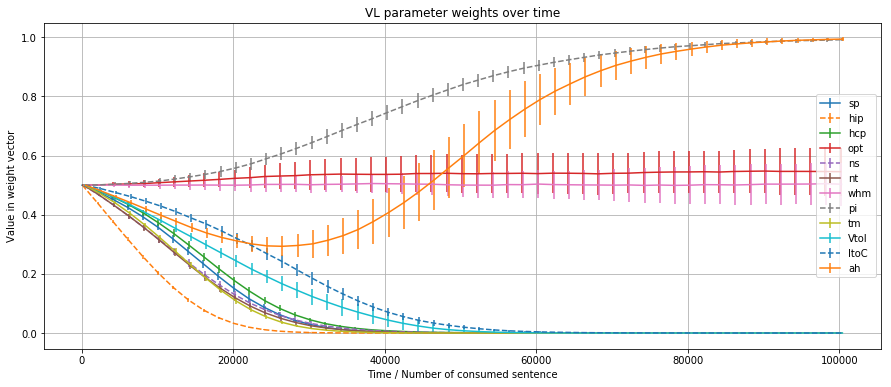

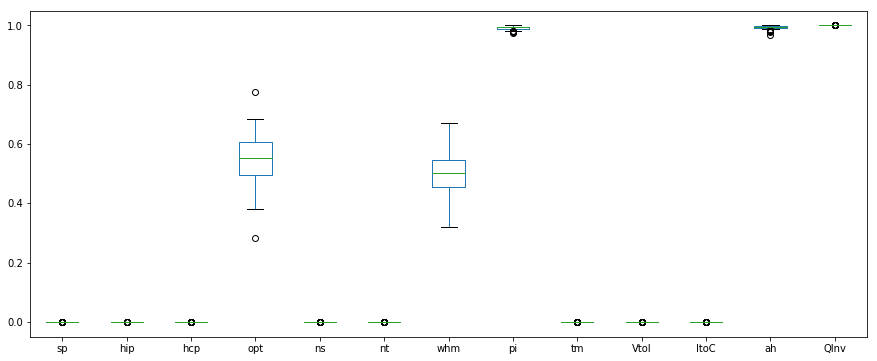

In [8]:
plt.rcParams['figure.figsize'] = 15, 6
plot_vl(reward_only_data)
plt.title('VL parameter weights over time')
plt.xlabel('Time / Number of consumed sentence')
plt.ylabel('Value in weight vector')
reward_only_data.groupby(0).tail(1).loc[:, 1:].plot.box()
plt.xticks(np.arange(1, 14), parameters);

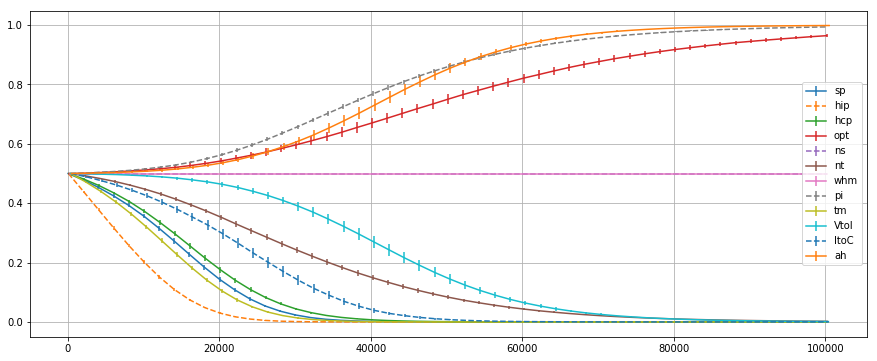

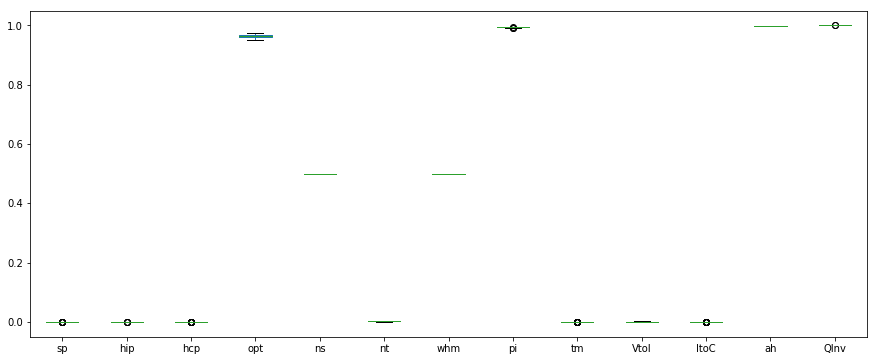

In [6]:
plot_vl(reward_relevant_only)
reward_relevant_only.groupby(0).tail(1).loc[:, 1:].plot.box()
plt.xticks(np.arange(1, 14), parameters);